###Объекты наблюдения и их атрибуты
Объекты наблюдения:
В данном случае объекты наблюдения — это акции компании Starbucks. Каждая запись в наборе данных представляет собой отдельный день торговли акциями.

Атрибуты акций Starbucks могут включают в себя:
Date: Дата торгового дня.
Open: Открывающая цена акций Starbucks на данный день.
High: Наивысшая цена акций Starbucks в течение торгового дня.
Low: Наименьшая цена акций Starbucks в течение торгового дня.
Close: Закрывающая цена акций Starbucks на данный день.
Adj Close: Скорректированная закрывающая цена акций Starbucks.
Volume: Объем торгов акциями Starbucks на данный день.

Связи между объектами могут проявляться в виде:
Временных зависимостей: Например, изменения цен акций в разные дни могут быть связаны с событиями, происходящими в компании или на рынке в целом.
Корреляции: Например, высокая цена акций в один день может быть связана с высоким объемом торгов, что может указывать на повышенный интерес инвесторов.

Бизнес-цели

Оптимизация инвестиционных решений:
Эффект для бизнеса: Более обоснованные инвестиционные решения могут привести к увеличению доходности инвестиций.
Цели технического проекта: Разработка модели прогнозирования, которая будет предсказывать будущие изменения цен акций на основе исторических данных.
Входные данные: Данные о ценах акций, объемах торгов и других рыночных индикаторах.
Целевой признак: Прогнозируемая цена акций на следующий день.

Анализ влияния сезонности на цены акций:
Эффект для бизнеса: Понимание сезонных колебаний цен акций может помочь в планировании инвестиционных решений и управлении активами.
Цели технического проекта: Разработка системы, которая будет анализировать данные о ценах акций Starbucks в зависимости от времени года, выявляя сезонные тренды и аномалии.
Входные данные: Данные о ценах акций (Close, Adj Close) и дате (Date), чтобы определить сезонные паттерны.
Целевой признак: Изменение цен акций в зависимости от сезона, что может быть измерено через процентное изменение цен в разные временные промежутки (например, кварталы или месяцы). 

#### Загрузка набора данных 

In [50]:
import pandas as pd
import numpy as np

starbucks = pd.read_csv("data/starbucks.csv")

# Проверяем результат
print(starbucks.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800


#### Унитарное кодирование

Преобразование категориального признака в несколько бинарных признаков

#### Унитарное кодирование признака Дата (Date) и объем продаж (Volume)

Кодирование

In [51]:
from sklearn.preprocessing import OneHotEncoder


# Преобразуем столбец 'Date' в формат даты
starbucks["Date"] = pd.to_datetime(starbucks["Date"])


# Функция для определения сезона
def get_season(date):
    if date.month in [12, 1, 2]:
        return "Winter"
    elif date.month in [3, 4, 5]:
        return "Spring"
    elif date.month in [6, 7, 8]:
        return "Summer"
    elif date.month in [9, 10, 11]:
        return "Autumn"


# Применяем функцию к столбцу 'Date'
starbucks["Season"] = starbucks["Date"].apply(get_season)

# Кодируем сезоны с помощью OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # Изменили drop на None
encoded_values = encoder.fit_transform(starbucks[["Season"]])

# Получаем названия закодированных столбцов
encoded_columns = encoder.get_feature_names_out(["Season"])

# Проверяем результат
print(starbucks.head())

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400   
1 1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800   
2 1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600   
3 1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800   
4 1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800   

   Season  
0  Summer  
1  Summer  
2  Summer  
3  Summer  
4  Summer  


Добавление признаков в исходный Dataframe

In [52]:
# Создаем DataFrame с закодированными значениями
encoded_values_df = pd.DataFrame(encoded_values, columns=encoded_columns)

# Объединяем закодированные значения с исходным DataFrame
starbucks = pd.concat([starbucks, encoded_values_df], axis=1)


starbucks

Date       Open       High        Low      Close  Adj Close  \
0    1992-06-26   0.328125   0.347656   0.320313   0.335938   0.260703   
1    1992-06-29   0.339844   0.367188   0.332031   0.359375   0.278891   
2    1992-06-30   0.367188   0.371094   0.343750   0.347656   0.269797   
3    1992-07-01   0.351563   0.359375   0.339844   0.355469   0.275860   
4    1992-07-02   0.359375   0.359375   0.347656   0.355469   0.275860   
...         ...        ...        ...        ...        ...        ...   
8031 2024-05-17  75.269997  78.000000  74.919998  77.849998  77.849998   
8032 2024-05-20  77.680000  78.320000  76.709999  77.540001  77.540001   
8033 2024-05-21  77.559998  78.220001  77.500000  77.720001  77.720001   
8034 2024-05-22  77.699997  81.019997  77.440002  80.720001  80.720001   
8035 2024-05-23  80.099998  80.699997  79.169998  79.260002  79.260002   

         Volume  Season  Season_Autumn  Season_Spring  Season_Summer  \
0     224358400  Summer            0.0            0.0            1.0   
1      58732800  Summer            0.0            0.0            1.0   
2      34777600  Summer            0.0            0.0            1.0   
3      18316800  Summer            0.0            0.0            1.0   
4      13996800  Summer            0.0            0.0            1.0   
...         ...     ...            ...            ...            ...   
8031   14436500  Spring            0.0            1.0            0.0   
8032   11183800  Spring            0.0            1.0            0.0   
8033    8916600  Spring            0.0            1.0            0.0   
8034   22063400  Spring            0.0            1.0            0.0   
8035    4651418  Spring            0.0            1.0            0.0   

      Season_Winter  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
8031            0.0  
8032            0.0  
8033            0.0  
8034            0.0  
8035            0.0  

[8036 rows x 12 columns]

In [53]:
# Проверяем уникальные значения в столбце 'Season'
print(starbucks["Season"].unique())
print(starbucks.columns)

['Summer' 'Autumn' 'Winter' 'Spring']
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Season',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


Вывод: 
Предсказательная способность:
признак Season может помочь в предсказании объема продаж, так как спрос на акции может варьироваться в зависимости от времени года (что используется в одной из бизнес целей).

Скорость вычисления:

Признаки должны быть вычисляемыми за разумное время. Например, создание признака Season с использованием функции apply может быть медленным, однако на данном наборе данных все вычисляется очень быстро

Надежность:
данные о продажах не меняются -> созданные признаки должны оставаться актуальными.

Корреляция:
Признаки имеют низкую степень корреляции

#### Дискретизация признаков

Равномерное разделение данных на 3 группы (по объему продаж)

In [54]:
labels = ["low", "medium", "high"]
num_bins = 3

In [55]:
hist1, bins1 = np.histogram(starbucks["Volume"].fillna(starbucks["Volume"].median()), bins=num_bins)
bins1, hist1

(array([1.50400000e+06, 1.96172267e+08, 3.90840533e+08, 5.85508800e+08]),
 array([8032,    3,    1]))

In [56]:
pd.concat([starbucks["Volume"], pd.cut(starbucks["Volume"], list(bins1))], axis=1).head(20)

Volume                          Volume
0   224358400  (196172266.667, 390840533.333]
1    58732800      (1504000.0, 196172266.667]
2    34777600      (1504000.0, 196172266.667]
3    18316800      (1504000.0, 196172266.667]
4    13996800      (1504000.0, 196172266.667]
5     5753600      (1504000.0, 196172266.667]
6    10662400      (1504000.0, 196172266.667]
7    15500800      (1504000.0, 196172266.667]
8     3923200      (1504000.0, 196172266.667]
9    11040000      (1504000.0, 196172266.667]
10    5996800      (1504000.0, 196172266.667]
11   17062400      (1504000.0, 196172266.667]
12    4992000      (1504000.0, 196172266.667]
13   17062400      (1504000.0, 196172266.667]
14   15667200      (1504000.0, 196172266.667]
15   19744000      (1504000.0, 196172266.667]
16    7782400      (1504000.0, 196172266.667]
17   10892800      (1504000.0, 196172266.667]
18   10387200      (1504000.0, 196172266.667]
19    7052800      (1504000.0, 196172266.667]

In [57]:
pd.concat([starbucks["Volume"], pd.cut(starbucks["Volume"], list(bins1), labels=labels)], axis=1
).head(20)

Volume  Volume
0   224358400  medium
1    58732800     low
2    34777600     low
3    18316800     low
4    13996800     low
5     5753600     low
6    10662400     low
7    15500800     low
8     3923200     low
9    11040000     low
10    5996800     low
11   17062400     low
12    4992000     low
13   17062400     low
14   15667200     low
15   19744000     low
16    7782400     low
17   10892800     low
18   10387200     low
19    7052800     low

Вывод:
Предсказательная способность
Признак Volume_Group, который делит объем продаж на группы, также может быть полезен для выявления паттернов в данных.

Скорость вычисления
Признаки должны вычисляемыми за разумное время. 

Надежность
Признаки должны быть стабильными и не подвергаться значительным изменениям при небольших изменениях в данных. Например, если данные о продажах не меняются, то и созданные признаки должны оставаться актуальными. Это важно для обеспечения консистентности в предсказаниях.

Корреляция
Признаки не должны быть сильно коррелированы между собой, чтобы избежать мультиколлинеарности. Например, если Volume и Open имеют высокую корреляцию, это может привести к проблемам в моделях, которые предполагают независимость признаков. Необходимо провести анализ корреляции между признаками и исключить избыточные.

Целостность
Признаки должны быть логически обоснованными и соответствовать бизнес-логике. Например, признак Volume_Group, который делит объем продаж на группы, должен быть понятным и полезным для анализа. Это поможет в интерпретации результатов и принятии бизнес-решений.

Пример анализа распределения объема продаж
Для анализа распределения объема продаж можно использовать гистограмму. Код, который используется, создает гистограмму для объема продаж, что позволяет визуализировать, как распределены продажи по группам.

Равномерное разделение данных на 3 группы c установкой собственной границы диапазона значений 

In [58]:
bins2 = np.linspace(1504000, 585508800, 4)

tmp_bins2 = np.digitize(starbucks["Volume"].fillna(starbucks["Volume"].median()), bins2)

hist2 = np.bincount(tmp_bins2 - 1)

bins2, hist2

(array([1.50400000e+06, 1.96172267e+08, 3.90840533e+08, 5.85508800e+08]),
 array([8032,    3,    0,    1]))

In [59]:
pd.concat([starbucks["Volume"], pd.cut(starbucks["Volume"], list(bins2))], axis=1).head(20)

Volume                          Volume
0   224358400  (196172266.667, 390840533.333]
1    58732800      (1504000.0, 196172266.667]
2    34777600      (1504000.0, 196172266.667]
3    18316800      (1504000.0, 196172266.667]
4    13996800      (1504000.0, 196172266.667]
5     5753600      (1504000.0, 196172266.667]
6    10662400      (1504000.0, 196172266.667]
7    15500800      (1504000.0, 196172266.667]
8     3923200      (1504000.0, 196172266.667]
9    11040000      (1504000.0, 196172266.667]
10    5996800      (1504000.0, 196172266.667]
11   17062400      (1504000.0, 196172266.667]
12    4992000      (1504000.0, 196172266.667]
13   17062400      (1504000.0, 196172266.667]
14   15667200      (1504000.0, 196172266.667]
15   19744000      (1504000.0, 196172266.667]
16    7782400      (1504000.0, 196172266.667]
17   10892800      (1504000.0, 196172266.667]
18   10387200      (1504000.0, 196172266.667]
19    7052800      (1504000.0, 196172266.667]

In [60]:
pd.concat(
    [starbucks["Volume"], pd.cut(starbucks["Volume"], list(bins2), labels=labels)], axis=1
).head(20)

Volume  Volume
0   224358400  medium
1    58732800     low
2    34777600     low
3    18316800     low
4    13996800     low
5     5753600     low
6    10662400     low
7    15500800     low
8     3923200     low
9    11040000     low
10    5996800     low
11   17062400     low
12    4992000     low
13   17062400     low
14   15667200     low
15   19744000     low
16    7782400     low
17   10892800     low
18   10387200     low
19    7052800     low

Равномерное разделение данных на 3 группы c установкой собственных интервалов (1504000 - МИН, МЕДИАНА - 11698150, МАКС 585508800)

In [61]:
hist3, bins3 = np.histogram(
    starbucks["Volume"].fillna(starbucks["Volume"].median()),
    bins=[1504000, 6601075, 298603475, 585508800],
)


bins3, hist3

(array([  1504000,   6601075, 298603475, 585508800]),
 array([1304, 6731,    1]))

In [62]:
pd.concat([starbucks["Volume"], pd.cut(starbucks["Volume"], list(bins3))], axis=1).head(20)

Volume                Volume
0   224358400  (6601075, 298603475]
1    58732800  (6601075, 298603475]
2    34777600  (6601075, 298603475]
3    18316800  (6601075, 298603475]
4    13996800  (6601075, 298603475]
5     5753600    (1504000, 6601075]
6    10662400  (6601075, 298603475]
7    15500800  (6601075, 298603475]
8     3923200    (1504000, 6601075]
9    11040000  (6601075, 298603475]
10    5996800    (1504000, 6601075]
11   17062400  (6601075, 298603475]
12    4992000    (1504000, 6601075]
13   17062400  (6601075, 298603475]
14   15667200  (6601075, 298603475]
15   19744000  (6601075, 298603475]
16    7782400  (6601075, 298603475]
17   10892800  (6601075, 298603475]
18   10387200  (6601075, 298603475]
19    7052800  (6601075, 298603475]

In [63]:
pd.concat(
    [starbucks["Volume"], pd.cut(starbucks["Volume"], list(bins3), labels=labels)], axis=1
).head(20)

Volume  Volume
0   224358400  medium
1    58732800  medium
2    34777600  medium
3    18316800  medium
4    13996800  medium
5     5753600     low
6    10662400  medium
7    15500800  medium
8     3923200     low
9    11040000  medium
10    5996800     low
11   17062400  medium
12    4992000     low
13   17062400  medium
14   15667200  medium
15   19744000  medium
16    7782400  medium
17   10892800  medium
18   10387200  medium
19    7052800  medium

Квантильное разделение данных на 3 группы

In [64]:
pd.concat(
    [starbucks["Volume"], pd.qcut(starbucks["Volume"], q=3, labels=False)], axis=1
).head(20)

Volume  Volume
0   224358400       2
1    58732800       2
2    34777600       2
3    18316800       2
4    13996800       1
5     5753600       0
6    10662400       1
7    15500800       2
8     3923200       0
9    11040000       1
10    5996800       0
11   17062400       2
12    4992000       0
13   17062400       2
14   15667200       2
15   19744000       2
16    7782400       0
17   10892800       1
18   10387200       1
19    7052800       0

In [65]:
pd.concat(
    [starbucks["Volume"], pd.qcut(starbucks["Volume"], q=3, labels=labels)], axis=1
).head(20)

Volume  Volume
0   224358400    high
1    58732800    high
2    34777600    high
3    18316800    high
4    13996800  medium
5     5753600     low
6    10662400  medium
7    15500800    high
8     3923200     low
9    11040000  medium
10    5996800     low
11   17062400    high
12    4992000     low
13   17062400    high
14   15667200    high
15   19744000    high
16    7782400     low
17   10892800  medium
18   10387200  medium
19    7052800     low

#### конструирование признаков на основе существующих

Season - время года (winter, autumn, summer, spring)

Volume - количество проданных акций

Open - цена открытия торгов

Close - цена закрытия

High - наивысшая цена торговли

Low - наименьшая цена торговли

In [66]:
# Создаем признак "Price_change" - изменение цены закрытия по сравнению с предыдущим днем
starbucks["Price_change"] = starbucks["Close"].diff().fillna(0)

# Создаем признак "High_Low_diff" - разница между наивысшей и наименьшей ценой за день
starbucks["High_Low_diff"] = starbucks["High"] - starbucks["Low"]

# Создаем признак "Open_Close_diff" - разница между ценой открытия и закрытия
starbucks["Open_Close_diff"] = starbucks["Open"] - starbucks["Close"]

starbucks = starbucks.drop(
    [
        "High",
        "Low",
        "Open",
        "Close",
        "Season_Autumn",
        "Season_Summer",
        "Season_Winter",
        "Season_Spring",
    ],
    axis=1,
)

# Выводим итоговый DataFrame
print(starbucks)

           Date  Adj Close     Volume  Season  Price_change  High_Low_diff  \
0    1992-06-26   0.260703  224358400  Summer      0.000000       0.027343   
1    1992-06-29   0.278891   58732800  Summer      0.023437       0.035157   
2    1992-06-30   0.269797   34777600  Summer     -0.011719       0.027344   
3    1992-07-01   0.275860   18316800  Summer      0.007813       0.019531   
4    1992-07-02   0.275860   13996800  Summer      0.000000       0.011719   
...         ...        ...        ...     ...           ...            ...   
8031 2024-05-17  77.849998   14436500  Spring      2.569999       3.080002   
8032 2024-05-20  77.540001   11183800  Spring     -0.309997       1.610001   
8033 2024-05-21  77.720001    8916600  Spring      0.180000       0.720001   
8034 2024-05-22  80.720001   22063400  Spring      3.000000       3.579995   
8035 2024-05-23  79.260002    4651418  Spring     -1.459999       1.529999   

      Open_Close_diff  
0           -0.007813  
1           -0.

Предсказательная способность

Price_change: Этот признак может быть полезен для предсказания будущих цен, так как показывает изменение цены закрытия по сравнению с предыдущим днем. Если цена закрытия растет, это может указывать на положительный тренд.

High_Low_diff: Разница между максимальной и минимальной ценой за день может служить индикатором волатильности. Высокая волатильность может указывать на неопределенность на рынке, что может повлиять на будущие цены.

Open_Close_diff: Этот признак показывает, как цена акций себя вела в течение дня. Если цена закрытия значительно отличается от цены открытия, это может указывать на сильные колебания в течение дня.

Volume_category: Объем торгов может быть индикатором интереса инвесторов к акциям. Высокий объем может указывать на сильные движения цен, что также может быть полезно для предсказания.

Скорость вычисления
Все предложенные признаки могут быть вычислены быстро, так как они основаны на простых арифметических операциях и использовании встроенных функций библиотеки Pandas. Это делает их подходящими для анализа больших объемов данных.

Надежность
Признаки, основанные на исторических данных, как правило, надежны, если данные корректны и не содержат выбросов. Однако, важно учитывать, что прошлые данные не всегда гарантируют будущие результаты, особенно в условиях изменяющегося рынка.

Корреляция
Необходимо провести анализ корреляции между признаками и целевой переменной (например, ценой закрытия на следующий день). Высокая корреляция может указывать на то, что признак имеет предсказательную силу. Однако, следует избегать мультиколлинеарности, когда два или более признаков сильно коррелируют между собой.

Целостность
Признаки должны быть целостны и не содержат пропусков.

#### Отсечение значений признаков

Определение выбросов с помощью boxplot

<Axes: >

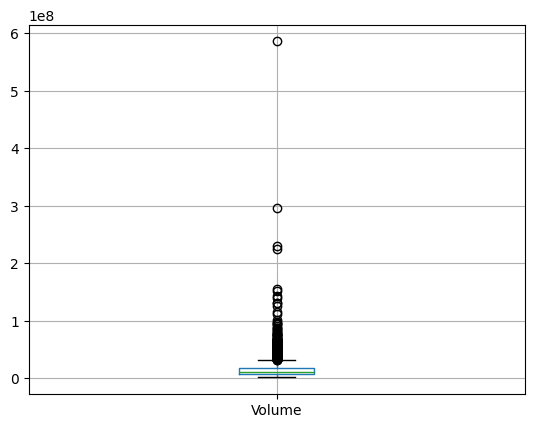

In [73]:

starbucks.boxplot(column="Volume")

Отсечение данных для признака Volume, значение которых больше 200000000 т.к. выше этой границы были выбросы

In [74]:
starbucks_norm = starbucks.copy()

starbucks_norm["VolumeClip"] = starbucks["Volume"].clip(0, 200000000)

starbucks_norm[starbucks_norm["Volume"] > 200000000][["Date", "Volume", "VolumeClip"]]

Date     Volume  VolumeClip
0    1992-06-26  224358400   200000000
824  1995-09-29  230883200   200000000
1771 1999-07-01  585508800   200000000
2007 2000-06-07  295411200   200000000

Винсоризация признака Volume

In [76]:
from scipy.stats.mstats import winsorize

print(starbucks_norm[starbucks_norm["Volume"] > 200000000][["Date", "Volume", "VolumeClip"]]
["Volume"].quantile(q=0.95))

starbucks_norm["VolumeWinsorize"] = winsorize(
    starbucks_norm["Volume"].fillna(starbucks_norm["Volume"].mean()), (0, 0.05), inplace=False
)

starbucks_norm[starbucks_norm["Volume"] > 200000000][["Date", "Volume", "VolumeWinsorize"]]

541994159.9999999


Date     Volume  VolumeWinsorize
0    1992-06-26  224358400         33800200
824  1995-09-29  230883200         33800200
1771 1999-07-01  585508800         33800200
2007 2000-06-07  295411200         33800200

#### Нормализация значений

In [77]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler_2 = preprocessing.MinMaxScaler(feature_range=(-1, 1))

starbucks_norm["VolumeNorm"] = min_max_scaler.fit_transform(
    starbucks_norm["Volume"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm["VolumeClipNorm"] = min_max_scaler.fit_transform(
    starbucks_norm["VolumeClip"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm["VolumeWinsorizeNorm"] = min_max_scaler.fit_transform(
    starbucks_norm["VolumeWinsorize"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm["VolumeWinsorizeNorm2"] = min_max_scaler_2.fit_transform(
    starbucks_norm["VolumeWinsorize"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm[
    ["Date", "Volume", "VolumeNorm", "VolumeClipNorm", "VolumeWinsorizeNorm", "VolumeWinsorizeNorm2"]
].head(20)

Date     Volume  VolumeNorm  VolumeClipNorm  VolumeWinsorizeNorm  \
0  1992-06-26  224358400    0.381597        1.000000             1.000000   
1  1992-06-29   58732800    0.097994        0.288312             1.000000   
2  1992-06-30   34777600    0.056975        0.167629             1.000000   
3  1992-07-01   18316800    0.028789        0.084701             0.520581   
4  1992-07-02   13996800    0.021392        0.062937             0.386820   
5  1992-07-06    5753600    0.007277        0.021409             0.131582   
6  1992-07-07   10662400    0.015682        0.046139             0.283575   
7  1992-07-08   15500800    0.023967        0.070514             0.433388   
8  1992-07-09    3923200    0.004142        0.012188             0.074907   
9  1992-07-10   11040000    0.016329        0.048041             0.295267   
10 1992-07-13    5996800    0.007693        0.022634             0.139112   
11 1992-07-14   17062400    0.026641        0.078381             0.481741   
12 1992-07-15    4992000    0.005973        0.017572             0.108000   
13 1992-07-16   17062400    0.026641        0.078381             0.481741   
14 1992-07-17   15667200    0.024252        0.071353             0.438541   
15 1992-07-20   19744000    0.031233        0.091891             0.564772   
16 1992-07-21    7782400    0.010751        0.031630             0.194401   
17 1992-07-22   10892800    0.016077        0.047300             0.290709   
18 1992-07-23   10387200    0.015211        0.044753             0.275054   
19 1992-07-24    7052800    0.009501        0.027954             0.171810   

    VolumeWinsorizeNorm2  
0               1.000000  
1               1.000000  
2               1.000000  
3               0.041163  
4              -0.226361  
5              -0.736836  
6              -0.432850  
7              -0.133223  
8              -0.850187  
9              -0.409466  
10             -0.721775  
11             -0.036518  
12             -0.783999  
13             -0.036518  
14             -0.122918  
15              0.129545  
16             -0.611199  
17             -0.418582  
18             -0.449892  
19             -0.656381

#### Стандартизация значений

In [78]:
from sklearn import preprocessing

stndart_scaler = preprocessing.StandardScaler()

starbucks_norm["VolumeStand"] = stndart_scaler.fit_transform(
    starbucks_norm["Volume"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm["VolumeClipStand"] = stndart_scaler.fit_transform(
    starbucks_norm["VolumeClip"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm["VolumeWinsorizeStand"] = stndart_scaler.fit_transform(
    starbucks_norm["VolumeWinsorize"].to_numpy().reshape(-1, 1)
).reshape(starbucks_norm["Volume"].shape)

starbucks_norm[["Date", "Volume", "VolumeStand", "VolumeClipStand", "VolumeWinsorizeStand"]].head(20)

Date     Volume  VolumeStand  VolumeClipStand  VolumeWinsorizeStand
0  1992-06-26  224358400    15.646534        15.953799              2.499736
1  1992-06-29   58732800     3.285840         3.795175              2.499736
2  1992-06-30   34777600     1.498056         1.733392              2.499736
3  1992-07-01   18316800     0.269580         0.316639              0.559890
4  1992-07-02   13996800    -0.052823        -0.055176              0.018657
5  1992-07-06    5753600    -0.668015        -0.764654             -1.014097
6  1992-07-07   10662400    -0.301670        -0.342162             -0.399095
7  1992-07-08   15500800     0.059421         0.074271              0.207086
8  1992-07-09    3923200    -0.804619        -0.922193             -1.243420
9  1992-07-10   11040000    -0.273490        -0.309662             -0.351788
10 1992-07-13    5996800    -0.649865        -0.743722             -0.983628
11 1992-07-14   17062400     0.175964         0.208675              0.402732
12 1992-07-15    4992000    -0.724854        -0.830203             -1.109515
13 1992-07-16   17062400     0.175964         0.208675              0.402732
14 1992-07-17   15667200     0.071840         0.088593              0.227934
15 1992-07-20   19744000     0.376093         0.439476              0.738698
16 1992-07-21    7782400    -0.516605        -0.590038             -0.759918
17 1992-07-22   10892800    -0.284475        -0.322332             -0.370230
18 1992-07-23   10387200    -0.322208        -0.365848             -0.433574
19 1992-07-24    7052800    -0.571056        -0.652834             -0.851326

Выводы: 
1.Предсказательная способность
Нормализация и стандартизация: Эти методы могут улучшить предсказательную способность признаков, так как они приводят данные к единому масштабу. Это особенно важно для алгоритмов, чувствительных к масштабу, таких как K-ближайших соседей или нейронные сети. Признаки, такие как Price_change, High_Low_diff, и Open_Close_diff, могут стать более информативными после этих преобразований.

Винсоризация: Этот метод помогает уменьшить влияние выбросов, что может улучшить предсказательную способность модели, так как она будет менее подвержена искажениям из-за аномальных значений.

2.Скорость вычисления
Применение нормализации и стандартизации может немного увеличить время вычислений, так как требуется дополнительный шаг для преобразования данных. Однако, в данном случае это незначительное увеличение времени.
Винсоризация также может добавить некоторую вычислительную нагрузку, но она в данном случае незначительна.

3.Надежность
Нормализация и стандартизация могут повысить надежность признаков, так как они уменьшают влияние выбросов и делают данные более однородными. Это может привести к более стабильным и надежным результатам при обучении модели.
Винсоризация помогает устранить аномальные значения, что также способствует повышению надежности.

4.Корреляция
После нормализации и стандартизации корреляции между признаками могут измениться. Это может помочь выявить более сильные связи между признаками и целевой переменной. Однако важно следить за мультиколлинеарностью, так как некоторые признаки могут стать слишком коррелированными.
Винсоризация может помочь уменьшить влияние выбросов на корреляцию, что может привести к более точным оценкам взаимосвязей между признаками.

5.Целостность
Нормализация и стандартизация не влияют на целостность данных, если они применяются корректно. Однако важно следить за тем, чтобы не было пропусков в данных, так как это может повлиять на качество модели.
Винсоризация и отсечение выбросов помогают поддерживать целостность данных, так как они устраняют аномальные значения, которые могут исказить результаты.

Заключение
В целом, применение нормализации, стандартизации, винсоризации и отсечения выбросов может значительно улучшить качество признаков для предсказания цен акций Starbucks. Эти методы помогают сделать данные более однородными, надежными и информативными, что в свою очередь может привести к более точным и стабильным результатам при использовании методов машинного обучения.